# Top Earners in the Movie Industry

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> I chose the IMDB movie dataset. I've wanted to know how much the different movie genres, directors and production companies have grossed over a period of time.

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
df = pd.read_csv('imdb-movies.csv')

In [42]:
df

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000e+00,0.000000e+00
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000e+00,0.000000e+00
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00,0.000000e+00
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00


Lets start by examining what columns this dataset contains

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

### Data Cleaning

Let's drop the coloumns we wont need to analyze revenue

In [44]:
df.drop(
    ['id', 'imdb_id', 'popularity', 'cast', 'homepage', 'tagline', 'overview', 'keywords', 'vote_count', 'vote_average', 'budget_adj', 'revenue_adj'],
    axis='columns',
    inplace=True
)

In [45]:
#This is an example of data each row of the table should contain
df.head(1)

,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,release_year
0,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,2015


How many movie titles here have been recreated/duplicated: 277

In [46]:
df[df.original_title.duplicated()].original_title.value_counts()

Hamlet                      3
Beauty and the Beast        2
Alice in Wonderland         2
Jane Eyre                   2
Annie                       2
                           ..
Night of the Living Dead    1
Great Expectations          1
Black Christmas             1
The Raven                   1
Gimme Shelter               1
Name: original_title, Length: 277, dtype: int64

For example: Beauty and the Beast has been made 3 different times

In [47]:
df.query('original_title == "Beauty and the Beast"')

,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,release_year
1586,0,0,Beauty and the Beast,David Lister,90,Fantasy,Limelight Productions,11/4/09,2009
9316,25000000,377350553,Beauty and the Beast,Gary Trousdale|Kirk Wise,84,Romance|Family|Animation|Fantasy|Music,Walt Disney Pictures|Walt Disney Animation Stu...,11/12/91,1991
9700,0,0,Beauty and the Beast,Eugene Marner,94,Music|Romance|Family,NaN,4/1/87,1987


How many rows in each column contain Null values?: 1097

In [48]:
df.isna().sum()

budget                     0
revenue                    0
original_title             0
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
release_year               0
dtype: int64

Lets examine those rows below:
It looks like most often, the movie's production company is missing

In [49]:
df[df.isna().any(axis=1)]

,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,release_year
228,0,0,Racing Extinction,Louie Psihoyos,90,Adventure|Documentary,NaN,1/24/15,2015
259,0,0,Crown for Christmas,Alex Zamm,84,TV Movie,NaN,11/27/15,2015
295,0,0,12 Gifts of Christmas,Peter Sullivan,84,Family|TV Movie,NaN,11/26/15,2015
298,0,0,The Girl in the Photographs,Nick Simon,95,Crime|Horror|Thriller,NaN,9/14/15,2015
328,0,0,Advantageous,Jennifer Phang,92,Science Fiction|Drama|Family,NaN,6/23/15,2015
...,...,...,...,...,...,...,...,...,...
10804,0,0,Interiors,Woody Allen,93,Drama,NaN,8/2/78,1978
10806,0,0,Gates of Heaven,Errol Morris,85,Documentary,NaN,10/1/78,1978
10816,0,0,The Rutles: All You Need Is Cash,Eric Idle|Gary Weis,76,Comedy,NaN,3/22/78,1978
10842,0,0,Winnie the Pooh and the Honey Tree,Wolfgang Reitherman,25,Animation|Family,NaN,1/1/66,1966


These are likely indie films, not produced by one company.

We should drop these records since we wont be able to analyze the revenue for their production companies

In [50]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

In [51]:
#The below code shows us that no movies remain that are missing data points
df[df.isna().any(axis=1)]

,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,release_year


#### Check datatypes

In [52]:
df.dtypes

budget                   int64
revenue                  int64
original_title          object
director                object
runtime                  int64
genres                  object
production_companies    object
release_date            object
release_year             int64
dtype: object

<b>Genres/Production Companies:<b/>

For every string of genres in each record split the genres/production companies into a list if there are multiple listed.
This way we should be to query whichever production company we need

In [53]:
#Query to see all production companies containing a vertical bar:
records = df.copy()
records.production_companies = records.production_companies.apply(lambda s:s.split('|'))
records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9807 entries, 0 to 9806
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   budget                9807 non-null   int64 
 1   revenue               9807 non-null   int64 
 2   original_title        9807 non-null   object
 3   director              9807 non-null   object
 4   runtime               9807 non-null   int64 
 5   genres                9807 non-null   object
 6   production_companies  9807 non-null   object
 7   release_date          9807 non-null   object
 8   release_year          9807 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 689.7+ KB


#### If I created one record for each the `production_companies` a movie was release under and one record each for `genres`<br>and tried to run calculations, it wouldn't work because for many records, the amount of `production_companies`<br>and `genres` aren't the same, so I'll create 2 dataframes; one w/o a `production_companies` column and one w/o a `genres` columns

In [54]:
df.tail()

,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,release_year
9802,0,0,The Endless Summer,Bruce Brown,95,Documentary,Bruce Brown Films,6/15/66,1966
9803,0,0,Grand Prix,John Frankenheimer,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,1966
9804,0,0,Beregis Avtomobilya,Eldar Ryazanov,94,Mystery|Comedy,Mosfilm,1/1/66,1966
9805,0,0,"What's Up, Tiger Lily?",Woody Allen,80,Action|Comedy,Benedict Pictures Corp.,11/2/66,1966
9806,19000,0,Manos: The Hands of Fate,Harold P. Warren,74,Horror,Norm-Iris,11/15/66,1966


#### One `production_companies` per record

We will use the explode method:


First we have the split the string into a list in the column we want to seperate into individual rows

Then we can use .explode to break each item in that list into separate rows

In [55]:
df_pc = df
df_pc.production_companies = df_pc.production_companies.str.split('\|')
df_pc = df_pc.explode('production_companies')
df_pc.drop('genres', axis=1, inplace=True)
df_pc.reset_index(drop=True, inplace=True)

In [56]:
df_pc.production_companies.value_counts().nlargest(10)

Universal Pictures                        522
Warner Bros.                              509
Paramount Pictures                        431
Twentieth Century Fox Film Corporation    282
Columbia Pictures                         272
New Line Cinema                           219
Metro-Goldwyn-Mayer (MGM)                 218
Walt Disney Pictures                      213
Touchstone Pictures                       178
Columbia Pictures Corporation             160
Name: production_companies, dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis

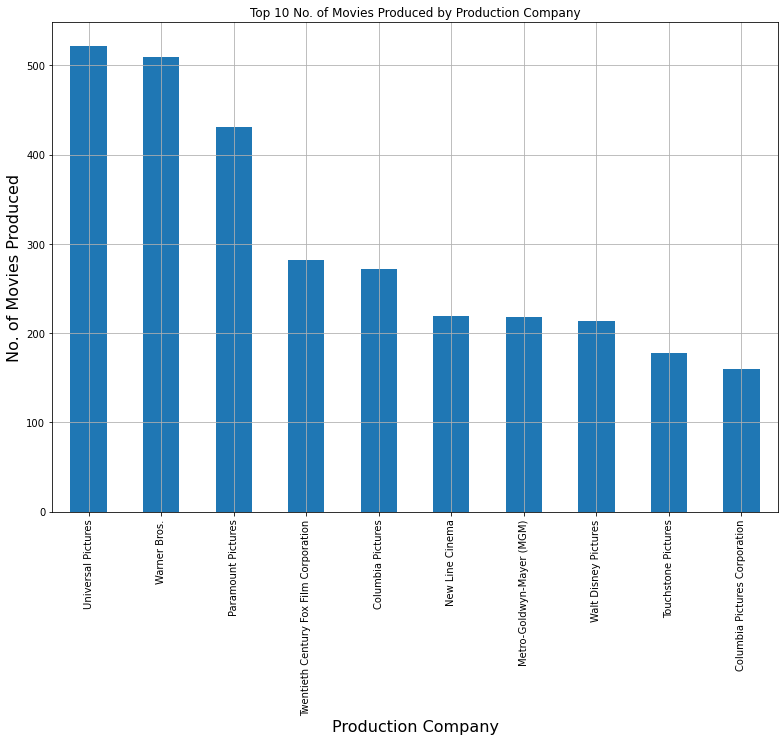

In [57]:
df_pc_10 = df_pc.production_companies.value_counts().nlargest(10)
labels = df_pc_10.index

plt.figure(figsize=(13, 9))
df_pc_10.plot(x=labels, y=df_pc_10, kind='bar')
plt.xlabel('Production Company', fontsize=16)
plt.ylabel('No. of Movies Produced', fontsize=16)
plt.title('Top 10 No. of Movies Produced by Production Company')
plt.grid(True);

Universal Pictures and Warner Bros. are the only two production companies to have produced over 500 movies (through 2015). Note: Columbia pictures corporation merged with Columbia Pictures in 1968.

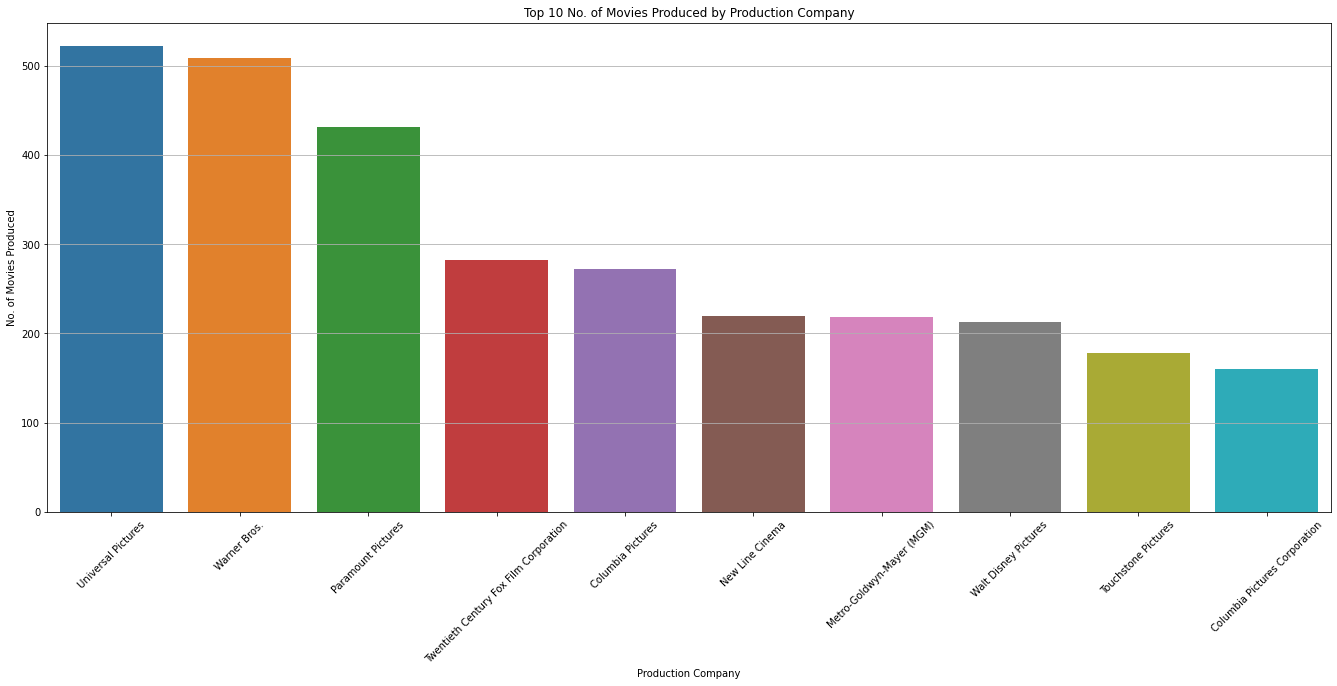

In [58]:
#The below version seperates each company by a different color which may
#be more visually apealling for the reader.

plt.figure(figsize=(23, 9))
plt.xticks(rotation=45)
plt.title('Top 10 No. of Movies Produced by Production Company')
plt.grid(True)
top_10_production_companies = sns.barplot(x=df_pc_10.index, y=df_pc_10)
top_10_production_companies.set(xlabel='Production Company', ylabel='No. of Movies Produced');

#### One `genre` per record

In [59]:
df_g = df
df_g.genres = df_g.genres.str.split('\|')
df_g = df_g.explode('genres')
df_g.drop('production_companies', axis=1, inplace=True)
df_g.reset_index(drop=True, inplace=True)

In [60]:
df_g.genres.value_counts().nlargest(10)

Drama              4370
Comedy             3438
Thriller           2748
Action             2236
Romance            1570
Horror             1526
Adventure          1385
Crime              1300
Science Fiction    1138
Family             1103
Name: genres, dtype: int64

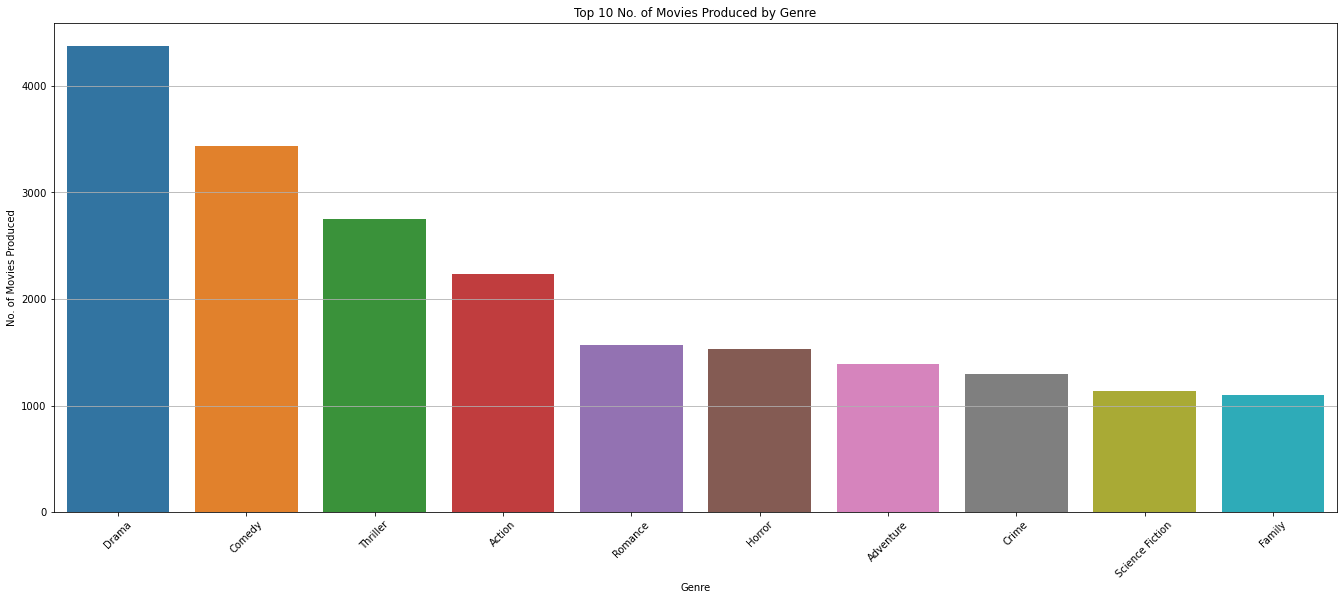

In [61]:
df_g_10 = df_g.genres.value_counts().nlargest(10)
labels = df_g_10.index

plt.figure(figsize=(23, 9))
plt.xticks(rotation=45)
plt.title('Top 10 No. of Movies Produced by Genre')
plt.grid(True)
top_10_genres = sns.barplot(x=df_g_10.index, y=df_g_10)
top_10_genres.set(xlabel='Genre', ylabel='No. of Movies Produced');

The most movies through 2015 have been Drama and Comedy

In [62]:
df_d = df_pc.groupby('director').revenue.sum().nlargest(10)
df_d

director
Steven Spielberg     26442382127
James Cameron        21125050425
Peter Jackson        20116705877
Michael Bay          18173180088
Christopher Nolan    16507597709
Ridley Scott         15395124910
Tim Burton           14641331210
Roland Emmerich      12931707846
J.J. Abrams          12646351451
David Yates          11512834548
Name: revenue, dtype: int64

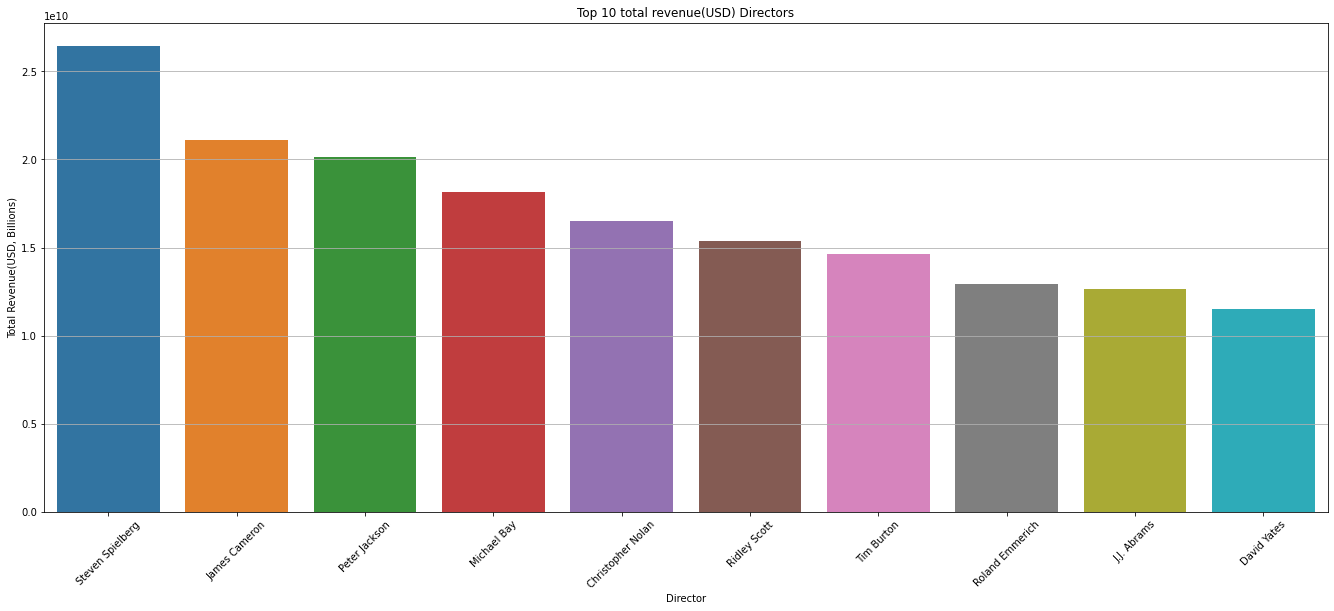

In [63]:
plt.figure(figsize=(23, 9))
plt.xticks(rotation=45)
plt.title('Top 10 total revenue(USD) Directors')
plt.grid(True)
top_10_directors = sns.barplot(x=df_d.index, y=df_d)
top_10_directors.set(xlabel='Director', ylabel='Total Revenue(USD, Billions)');

In [64]:
df.groupby('original_title').revenue.max().nlargest(10)

original_title
Avatar                                          2781505847
Star Wars: The Force Awakens                    2068178225
Titanic                                         1845034188
The Avengers                                    1519557910
Jurassic World                                  1513528810
Furious 7                                       1506249360
Avengers: Age of Ultron                         1405035767
Harry Potter and the Deathly Hallows: Part 2    1327817822
Frozen                                          1274219009
Iron Man 3                                      1215439994
Name: revenue, dtype: int64

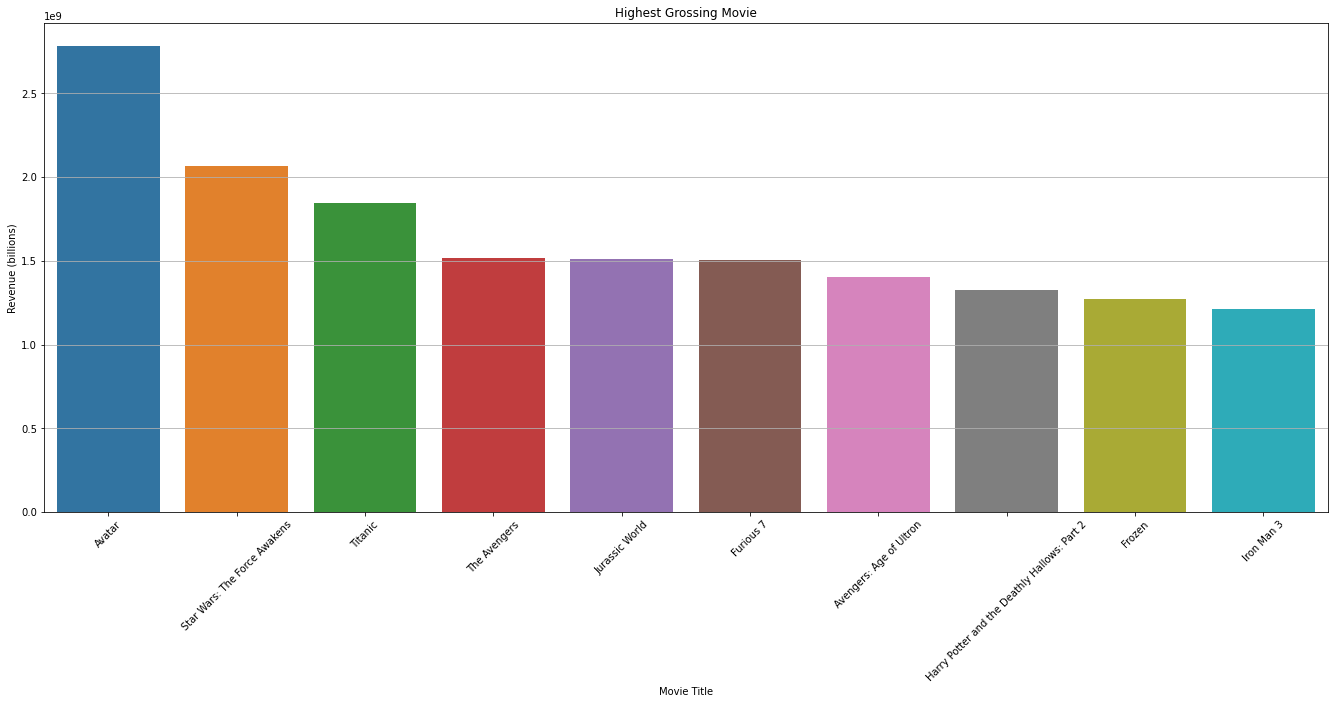

In [65]:
df_m = df.groupby('original_title').revenue.max().nlargest(10)
plt.figure(figsize=(23, 9))
plt.xticks(rotation=45)
plt.title('Highest Grossing Movie')
plt.grid(True)
top_10_movies = sns.barplot(x=df_m.index, y=df_m)
top_10_movies.set(xlabel='Movie Title', ylabel='Revenue (billions)');

In [66]:
df_cast = pd.read_csv('imdb-movies.csv')

df_cast.cast = df_cast.cast.str.split('\|')
df_cast = df_cast.explode('cast')
df_cast.drop(['genres', 'production_companies', 'director'], axis=1, inplace=True)
df_cast.reset_index(drop=True, inplace=True)

In [67]:
df_c = df_cast.groupby('cast').revenue.sum().nlargest(10)
df_c

cast
Harrison Ford        8922840695
Tom Cruise           8812436186
Tom Hanks            8418142612
Emma Watson          8176916698
Ian McKellen         8115046043
Johnny Depp          7979521265
Daniel Radcliffe     7863036755
Rupert Grint         7696691044
Robert Downey Jr.    7419289468
Ralph Fiennes        7135927496
Name: revenue, dtype: int64

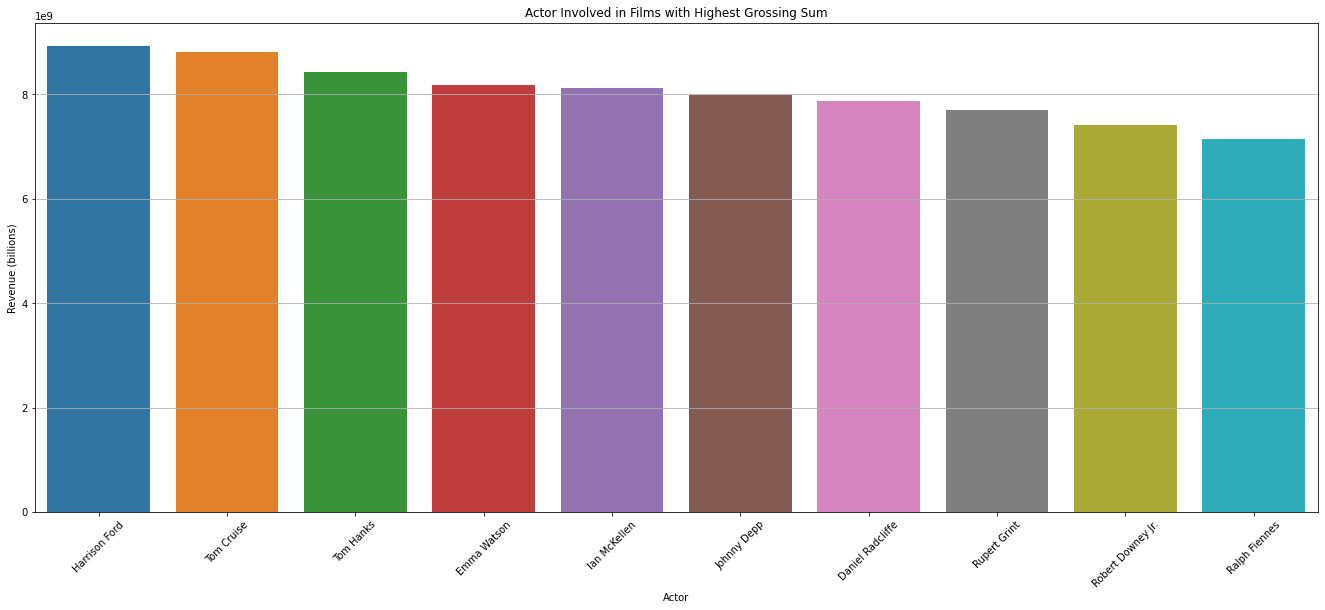

In [68]:
plt.figure(figsize=(23, 9))
plt.xticks(rotation=45)
plt.title('Actor Involved in Films with Highest Grossing Sum')
plt.grid(True)
top_10_cast = sns.barplot(x=df_c.index, y=df_c)
top_10_cast.set(xlabel='Actor', ylabel='Revenue (billions)');